# Week5 - Logistic Regression Assignment

- Run the below cells.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')

df.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [59]:
# insert code
# Check the number of rows and columns
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

(1000, 19)
left_company                     0
age                              0
frequency_of_travel              0
department                       0
commuting_distance               0
education                        0
satisfaction_with_environment    0
gender                           0
seniority_level                  0
position                         0
satisfaction_with_job            0
married_or_single                0
last_raise_pct                   0
last_performance_rating          0
total_years_working              0
years_at_company                 0
years_in_current_job             0
years_since_last_promotion       0
years_with_current_supervisor    0
dtype: int64
left_company                     object
age                               int64
frequency_of_travel              object
department                       object
commuting_distance                int64
education                         int64
satisfaction_with_environment     int64
gender                         

In [60]:
# Convert 'left_company' from Yes/No to 1/0
df['left_company'] = df['left_company'].map({'Yes': 1, 'No': 0})
df['left_company'].unique()


array([0, 1], dtype=int64)

left_company
0    500
1    500
Name: count, dtype: int64


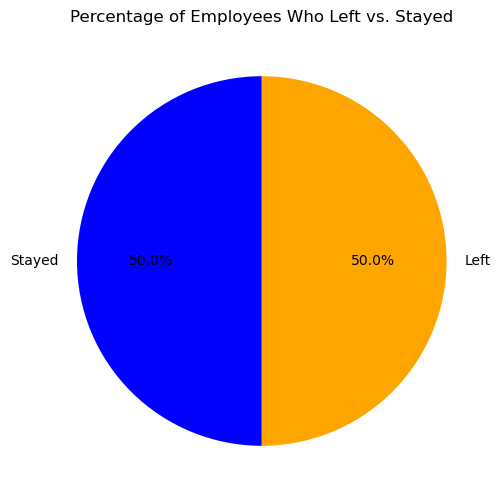

In [61]:
# Count employees who left vs. stayed
left_counts = df['left_company'].value_counts()
print(left_counts)

# Define meaningful labels
labels = ['Left' if idx == 1 else 'Stayed' for idx in left_counts.index]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(left_counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)
plt.title("Percentage of Employees Who Left vs. Stayed")
plt.show()



Yes, if the classification distribution is unbalanced there should be concerned. But here the classification distribution is balanced.

# Question 2
- Do a quick EDA
- Can you create new features that captures the relation with the target better?

#### Suggested features engineering
1. Years in Position Ratio: (years_in_current_job / years_at_company), showing if they stay long in the same position.
2. Supervisor Relationship: (years_with_current_supervisor / years_at_company), showing loyalty to supervisors.
3. Job Satisfaction Index: A weighted sum of satisfaction_with_job, satisfaction_with_environment.

In [65]:
# Ensure there are no division-by-zero issues
df.replace({0: np.nan}, inplace=True)

# Job Stability
df['years_in_position_ratio'] = df['years_in_current_job'] / df['years_at_company']

df['supervisor_relationship'] = df['years_with_current_supervisor'] / df['years_at_company']

# Job satisfaction
df['job_satisfaction_index'] = (df['satisfaction_with_job'] + df['satisfaction_with_environment']) / 2

# Replace back NaNs with 0 for meaningful interpretation
df.fillna(0, inplace=True)

# Display the new features
print(df[['years_in_position_ratio', 
          'supervisor_relationship', 
         'job_satisfaction_index']].head())

   years_in_position_ratio  supervisor_relationship  job_satisfaction_index
0                 0.000000                 0.000000                     3.5
1                 0.800000                 0.700000                     3.0
2                 0.888889                 0.000000                     3.5
3                 0.388889                 0.722222                     3.5
4                 0.400000                 0.600000                     3.0


In [66]:
# Find categorical columns
categorical_Vars = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_Vars)

# Find numerical columns
numerical_Vars = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_Vars)

Categorical Columns: Index(['frequency_of_travel', 'department', 'gender', 'position',
       'married_or_single'],
      dtype='object')
Numerical Columns: Index(['left_company', 'age', 'commuting_distance', 'education',
       'satisfaction_with_environment', 'seniority_level',
       'satisfaction_with_job', 'last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_at_company', 'years_in_current_job',
       'years_since_last_promotion', 'years_with_current_supervisor',
       'years_in_position_ratio', 'supervisor_relationship',
       'job_satisfaction_index'],
      dtype='object')


In [67]:
# Convert Categorical Variables

df['frequency_of_travel'] = df['frequency_of_travel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['department'] = df['department'].map({'Research & Development': 0, 'Human Resources': 1, 'Sales': 2})
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['married_or_single'] = df['married_or_single'].map({'Married': 0, 'Divorced': 1, 'Single': 1})


In [68]:
print(df['position'].unique())  # check original categories

df['position'] = df['position'].map({
    'Laboratory Technician': 1, 
    'Healthcare Representative': 2, 
    'Sales Representative': 2,
    'Research Scientist': 3, 
    'Human Resources': 3,
    'Manager': 4, 
    'Manufacturing Director': 5, 
    'Research Director': 5, 
    'Sales Executive': 6,    
})

print(df['position'].unique())  # Make sure the conversion is correct


['Sales Executive' 'Laboratory Technician' 'Manufacturing Director'
 'Healthcare Representative' 'Manager' 'Research Scientist'
 'Research Director' 'Sales Representative' 'Human Resources']
[6 1 5 2 4 3]


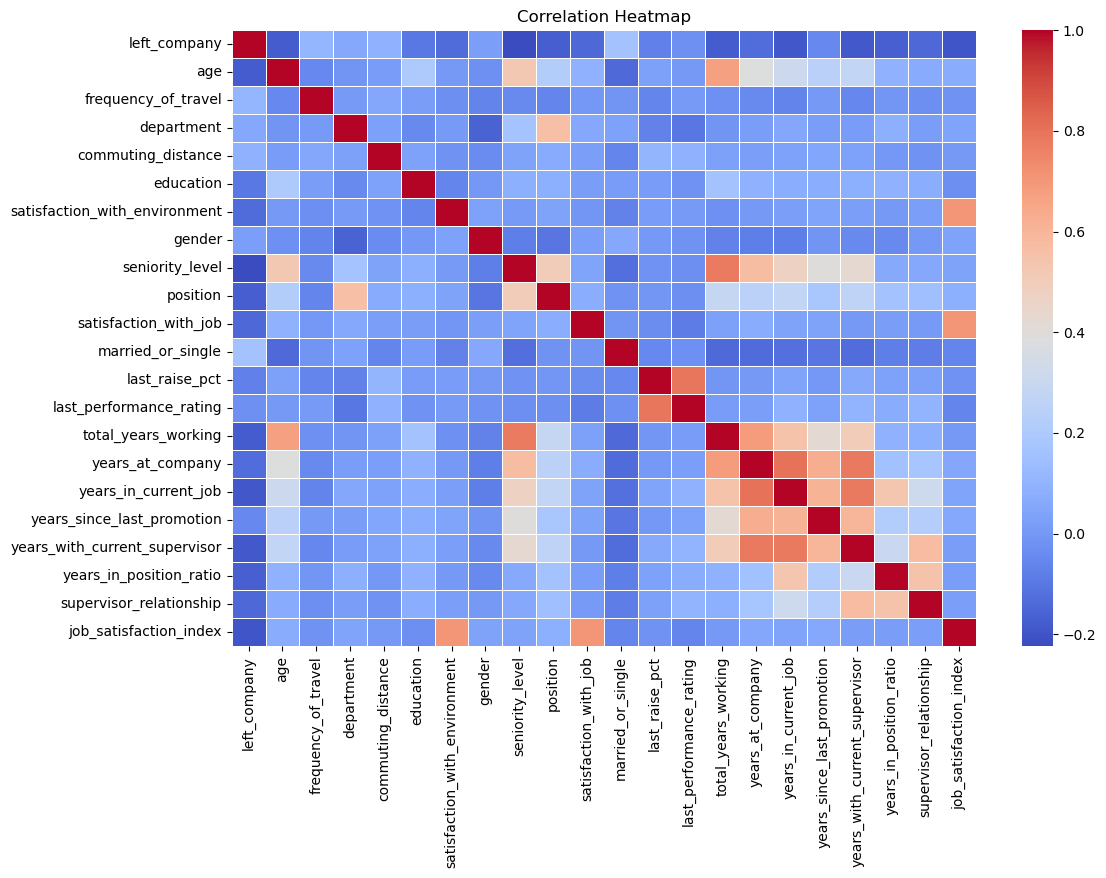

In [69]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


                          Feature  Coefficient
13            total_years_working     0.041994
0                             age    -0.084780
6                          gender     0.088070
19        supervisor_relationship     0.126102
5   satisfaction_with_environment    -0.134581
15           years_in_current_job    -0.137148
12        last_performance_rating     0.151125
4                       education    -0.170095
1             frequency_of_travel     0.190194
9           satisfaction_with_job    -0.198860
20         job_satisfaction_index    -0.236460
11                 last_raise_pct    -0.254037
3              commuting_distance     0.262996
18        years_in_position_ratio    -0.285410
10              married_or_single     0.294605
16     years_since_last_promotion     0.327079
8                        position    -0.331814
2                      department     0.456067
7                 seniority_level    -0.484967
14               years_at_company     0.488996
17  years_wit

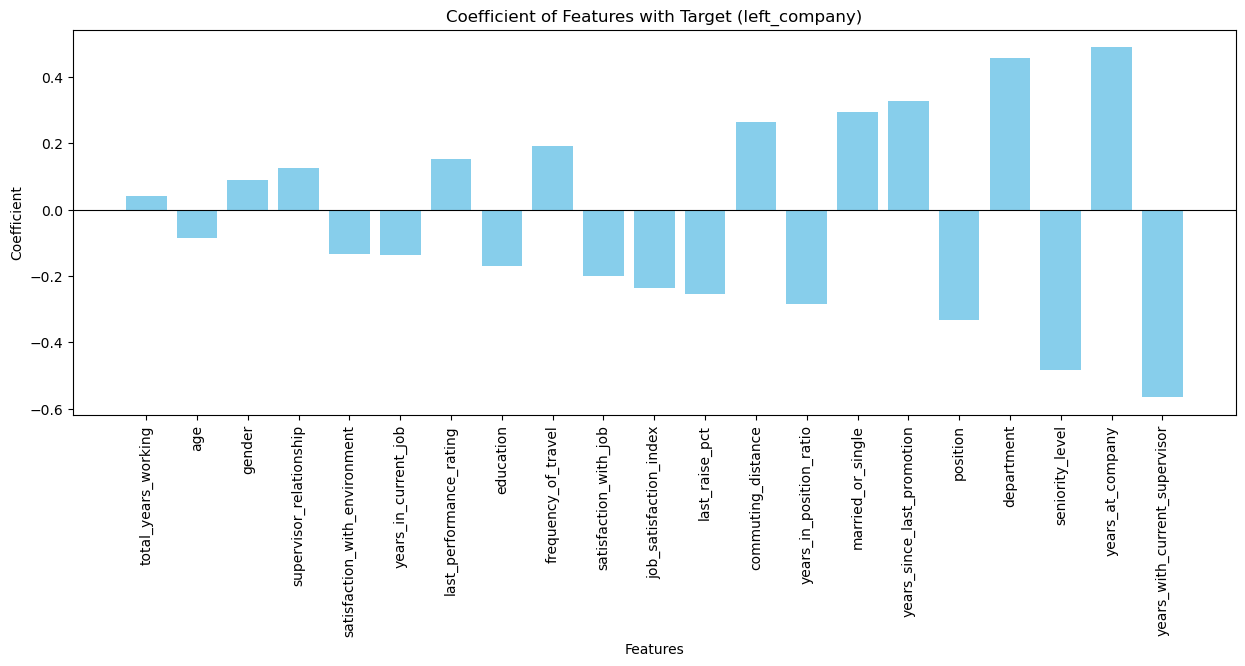

In [70]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Select independent variables and target variable
X = df.drop(columns=['left_company'])
y = df['left_company']

# Encode categorical variables using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)  

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# Get feature coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# Sort features by absolute coefficient values
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=True)
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(15, 5))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.axhline(0, color='black', linewidth=0.8)  # Add baseline
plt.title("Coefficient of Features with Target (left_company)")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.xticks(rotation=90)  # Rotate labels to prevent overlap
plt.show()


#### I created 3 new features, eg. 'years_in_position_ratio', 'supervisor_relationship' and 'job_satisfaction_index'. It looks like only 'job_satisfaction_index' feature captures the relation with the target better.

# Question 3
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [73]:
# Remove old variables with poor Coefficient
df = df.drop(columns=['satisfaction_with_job', 'satisfaction_with_environment', 'supervisor_relationship', 'years_in_current_job'])

print(df.columns)

Index(['left_company', 'age', 'frequency_of_travel', 'department',
       'commuting_distance', 'education', 'gender', 'seniority_level',
       'position', 'married_or_single', 'last_raise_pct',
       'last_performance_rating', 'total_years_working', 'years_at_company',
       'years_since_last_promotion', 'years_with_current_supervisor',
       'years_in_position_ratio', 'job_satisfaction_index'],
      dtype='object')


In [101]:

# List of numerical and categorical variables
numerical_vars = ['age', 'commuting_distance', 'last_raise_pct', 
                  'total_years_working', 'years_at_company', 
                  'years_since_last_promotion', 'years_with_current_supervisor', 'years_in_position_ratio']

categorical_vars = ['education', 'last_performance_rating', 'job_satisfaction_index', 
                  'seniority_level', 'frequency_of_travel', 'department', 'gender', 'position', 'married_or_single']

# Print the lists
print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)


Numerical Variables: ['age', 'commuting_distance', 'last_raise_pct', 'total_years_working', 'years_at_company', 'years_since_last_promotion', 'years_with_current_supervisor', 'years_in_position_ratio']
Categorical Variables: ['education', 'last_performance_rating', 'job_satisfaction_index', 'seniority_level', 'frequency_of_travel', 'department', 'gender', 'position', 'married_or_single']


#### Explanation:
1. Numerical Variables: These variables represent continuous measurements (e.g., age, distance, years).
2. Categorical Variables: These represent categories or classifications (e.g., department, gender, position, marital status).

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [105]:
# insert code here
from sklearn.model_selection import train_test_split

# choose proper features
X = df.drop(columns=['left_company'])  
y = df['left_company']

# Splitting the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)

# Checking the shape of the resulting datasets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Training set: (800, 17), (800,)
Test set: (200, 17), (200,)


# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [109]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define numerical pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Standardizing numerical features
])

# Define categorical pipeline
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding categorical features
])

# Apply ColumnTransformer to process both types of features
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_vars),
    ('cat', cat_pipeline, categorical_vars)
])

# Fit and transform training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Verify the shapes after transformation
print("Shape of transformed training set:", X_train_transformed.shape)
print("Shape of transformed test set:", X_test_transformed.shape)


Shape of transformed training set: (800, 43)
Shape of transformed test set: (200, 43)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [115]:
# insert code here
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a pipeline that first transforms the data, then applies logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Check for overfitting concerns
if train_accuracy > test_accuracy:
    print("There might be some overfitting. The model performs better on the training data.")
else:
    print("The model performs similarly on both training and test data, suggesting no significant overfitting.")

Training Accuracy: 0.7113
Test Accuracy: 0.7300
The model performs similarly on both training and test data, suggesting no significant overfitting.


#### Because both the training and test accuracy are similar, it indicates that the model generalizes well and overfitting is not an issue. Creating good features and dropping bad ones might be helpful.

# Question 7
Your supervisor asked you to extract learned parameters from the trained model. Give it as a dictionary. 

Another team will use these learned parameters to write a predictor in postgres.

#### I plan to extract the learned parameters (such as coefficients for the logistic regression model) and represent them as a dictionary, then another team can retrieve the coef_ (coefficients) and intercept_ (intercepts) from the trained LogisticRegression model.

In [128]:
import numpy as np

# Extract coefficients and intercept from the trained model
coef = model.named_steps['classifier'].coef_[0]
intercept = model.named_steps['classifier'].intercept_[0]

# Get the column names after preprocessing (one-hot encoding and scaling)
num_columns = numerical_vars  # Numerical features are unchanged
cat_columns = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_vars)  # One-hot encoded feature names

# Combine numerical and categorical columns
all_columns = np.concatenate([num_columns, cat_columns])

# Create a dictionary mapping column names to the learned coefficients
params_dict = {all_columns[i]: coef[i] for i in range(len(all_columns))}

# Add intercept to the dictionary
params_dict['intercept'] = intercept

# Print each learned parameter in the dictionary, rounding to 4 decimal places
for feature, coef_value in params_dict.items():
    print(f"{feature}: {coef_value:.4f}")

age: -0.0852
commuting_distance: 0.3288
last_raise_pct: -0.1727
total_years_working: 0.0426
years_at_company: 0.2778
years_since_last_promotion: 0.2770
years_with_current_supervisor: -0.3846
years_in_position_ratio: -0.3809
education_1: 0.1764
education_2: 0.3752
education_3: -0.2861
education_4: -0.0744
education_5: -0.2137
last_performance_rating_3: -0.0791
last_performance_rating_4: 0.0564
job_satisfaction_index_1.0: 1.2073
job_satisfaction_index_1.5: 0.6286
job_satisfaction_index_2.0: -0.0039
job_satisfaction_index_2.5: 0.1623
job_satisfaction_index_3.0: -0.6166
job_satisfaction_index_3.5: -0.5397
job_satisfaction_index_4.0: -0.8606
seniority_level_1: 1.1641
seniority_level_2: -0.4276
seniority_level_3: 0.2125
seniority_level_4: -1.2220
seniority_level_5: 0.2504
frequency_of_travel_0: -0.7204
frequency_of_travel_1: 0.2019
frequency_of_travel_2: 0.4959
department_0: -0.1544
department_1: 0.0043
department_2: 0.1275
gender_0: -0.0597
gender_1: 0.0370
position_1: 0.3343
position_2: 0.